### This book condenses scipts into functions

In [229]:
from sodapy import Socrata
import pandas as pd
import numpy as np
from datetime import timedelta, date
from dateutil.relativedelta import relativedelta

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofchicago.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofchicago.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("wqdh-9gek",order="request_date DESC", limit=100000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [230]:
results_df

,address,request_date,completion_date,number_of_potholes_filled_on_block,latitude,longitude,location
0,3316 N HAMLIN AVE,2020-03-19T15:07:10.000,2020-03-19T15:10:26.000,3,41.941525314,-87.722685954,"{'type': 'Point', 'coordinates': [-87.72268595..."
1,2400 N MANGO AVE,2020-03-19T14:58:34.000,2020-03-19T15:01:53.000,101,41.92421124,-87.770029445,"{'type': 'Point', 'coordinates': [-87.77002944..."
2,11100 S SAWYER AVE,2020-03-19T14:22:07.000,2020-03-19T14:23:20.000,2,41.691471832,-87.702083442,"{'type': 'Point', 'coordinates': [-87.70208344..."
3,11500 S HOMAN AVE,2020-03-19T14:19:28.000,2020-03-19T14:20:46.000,12,41.68410415,-87.705454513,"{'type': 'Point', 'coordinates': [-87.70545451..."
4,727 E 111TH ST,2020-03-19T13:56:38.000,2020-03-19T13:59:49.000,57,41.6921782,-87.6039953,"{'type': 'Point', 'coordinates': [-87.60399530..."
...,...,...,...,...,...,...,...
60647,7946 S KEDZIE Avenue,2018-03-08T15:29:10.000,2019-02-07T11:41:59.000,22,41.748382487,-87.70264148,"{'type': 'Point', 'coordinates': [-87.70264148..."
60648,2300 W NORTH AVE,2018-02-25T10:43:49.000,2018-07-02T08:44:33.000,20,NaN,NaN,NaN
60649,2413 N SB OUTER LAKE SHORE DR,2018-02-22T19:37:49.000,2018-08-16T07:27:14.000,1,NaN,NaN,NaN
60650,330 W GOETHE Street,2018-01-31T13:11:12.000,2018-12-26T12:40:18.000,2,41.905862218,-87.637595491,"{'type': 'Point', 'coordinates': [-87.63759549..."


In [231]:
CSV_PATH = "/home/zhimin90/CPT/CSVs/"

In [232]:
#URL = 'https://data.cityofchicago.org/resource/wqdh-9gek.csv'
#test_df = pd.read_csv(URL)
#test_df = pd.read_csv(CSV_PATH+"Potholes_Patched.csv")
test_df = results_df

In [233]:
test_df.columns = pd.Series(test_df.columns).apply(lambda x: x.upper()).values

In [234]:
xbound = (-87.9361,-87.5245)
ybound = (41.6447,42.023)

In [235]:
test_df = test_df[test_df.LATITUDE.notna()].sort_values(['REQUEST_DATE','COMPLETION_DATE'], ascending=[0,0])
test_df['REQUEST_DATE'] = pd.to_datetime(test_df['REQUEST_DATE'])
test_df['COMPLETION_DATE'] = pd.to_datetime(test_df['COMPLETION_DATE'])
test_df['LATITUDE'] = pd.to_numeric(test_df['LATITUDE'])
test_df['LONGITUDE'] = pd.to_numeric(test_df['LONGITUDE'])

df = test_df
df.columns

Index(['ADDRESS', 'REQUEST_DATE', 'COMPLETION_DATE',
       'NUMBER_OF_POTHOLES_FILLED_ON_BLOCK', 'LATITUDE', 'LONGITUDE',
       'LOCATION'],
      dtype='object')

In [237]:
print(max(test_df['REQUEST_DATE']))
print(min(test_df['REQUEST_DATE']))

2020-03-19 15:07:10
2018-01-31 13:11:12


In [238]:
df['LONGITUDE'].notna().index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            60636, 60637, 60638, 60639, 60640, 60641, 60642, 60644, 60647,
            60650],
           dtype='int64', length=52405)

In [239]:
df[df['LONGITUDE'].notna()]['LONGITUDE'].iloc[0]>xbound[1]

False

In [240]:
df

,ADDRESS,REQUEST_DATE,COMPLETION_DATE,NUMBER_OF_POTHOLES_FILLED_ON_BLOCK,LATITUDE,LONGITUDE,LOCATION
0,3316 N HAMLIN AVE,2020-03-19 15:07:10,2020-03-19 15:10:26,3,41.941525,-87.722686,"{'type': 'Point', 'coordinates': [-87.72268595..."
1,2400 N MANGO AVE,2020-03-19 14:58:34,2020-03-19 15:01:53,101,41.924211,-87.770029,"{'type': 'Point', 'coordinates': [-87.77002944..."
2,11100 S SAWYER AVE,2020-03-19 14:22:07,2020-03-19 14:23:20,2,41.691472,-87.702083,"{'type': 'Point', 'coordinates': [-87.70208344..."
3,11500 S HOMAN AVE,2020-03-19 14:19:28,2020-03-19 14:20:46,12,41.684104,-87.705455,"{'type': 'Point', 'coordinates': [-87.70545451..."
4,727 E 111TH ST,2020-03-19 13:56:38,2020-03-19 13:59:49,57,41.692178,-87.603995,"{'type': 'Point', 'coordinates': [-87.60399530..."
...,...,...,...,...,...,...,...
60641,332 W GOETHE Street,2018-03-21 11:08:10,2018-12-26 12:34:30,4,41.905860,-87.637693,"{'type': 'Point', 'coordinates': [-87.63769262..."
60642,1200 N CLYBOURN Avenue,2018-03-21 10:51:58,2018-12-26 12:33:14,7,41.903844,-87.639735,"{'type': 'Point', 'coordinates': [-87.63973456..."
60644,3000 S PULASKI Road,2018-03-20 12:53:40,2019-01-07 15:14:46,1,41.838615,-87.724608,"{'type': 'Point', 'coordinates': [-87.72460779..."
60647,7946 S KEDZIE Avenue,2018-03-08 15:29:10,2019-02-07 11:41:59,22,41.748382,-87.702641,"{'type': 'Point', 'coordinates': [-87.70264148..."


In [262]:
map_arr = []
interval_int = 30 #use 30 days data to predict next 7 days
series_range = 7 #days
time_interval = timedelta(days=interval_int)
date_start = min(df['REQUEST_DATE'])
date_end = max(df['REQUEST_DATE'])

geo_price_map = df[['REQUEST_DATE', 'COMPLETION_DATE','LATITUDE', 'LONGITUDE']]

In [263]:
date_start

Timestamp('2018-01-31 13:11:12')

In [264]:
date_end

Timestamp('2020-03-19 15:07:10')

In [265]:
(date_end - date_start).days

778

In [266]:
filter1a = pd.to_numeric(geo_price_map["LONGITUDE"]) > xbound[0]
filter1b = pd.to_numeric(geo_price_map["LONGITUDE"]) < xbound[1]
filter1c = pd.to_numeric(geo_price_map["LATITUDE"]) > ybound[0]
filter1d = pd.to_numeric(geo_price_map["LATITUDE"]) < ybound[1]
print("sum of remaining is: " + str(sum(filter1a&filter1b&filter1c&filter1d)))
geo_price_map = geo_price_map[filter1a&filter1b&filter1c&filter1d]

sum of remaining is: 52403


In [267]:
for int_cur_date in range(0, (date_end - date_start).days - interval_int, int(series_range)):
#for int_start_date in range(365, 565, interval_int):
    print(int_start_date)
    geo_price_map_filtered = geo_price_map[geo_price_map['LONGITUDE'].notnull()]
    
    #filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_start + timedelta(days=int_start_date))
    #filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_start + timedelta(days=int_start_date+interval_int))
    
    filter2 = geo_price_map_filtered['REQUEST_DATE'] > (date_end - timedelta(days=int_cur_date+interval_int))
    filter3 = geo_price_map_filtered['REQUEST_DATE'] <= (date_end -  timedelta(days=int_cur_date))
    
    print(date_end - timedelta(days=int_cur_date+interval_int))
    print(date_end -  timedelta(days=int_cur_date))
    
    
    geo_price_map_filtered = geo_price_map_filtered.where(filter2 & filter3)
    print("pothole count: " + str(len(geo_price_map_filtered.notnull().index)))
    print("_"*20)
    map_arr.append(geo_price_map_filtered)

742
2020-02-18 15:07:10
2020-03-19 15:07:10
pothole count: 52403
____________________
742
2020-02-11 15:07:10
2020-03-12 15:07:10
pothole count: 52403
____________________
742
2020-02-04 15:07:10
2020-03-05 15:07:10
pothole count: 52403
____________________
742
2020-01-28 15:07:10
2020-02-27 15:07:10
pothole count: 52403
____________________
742
2020-01-21 15:07:10
2020-02-20 15:07:10
pothole count: 52403
____________________
742
2020-01-14 15:07:10
2020-02-13 15:07:10
pothole count: 52403
____________________
742
2020-01-07 15:07:10
2020-02-06 15:07:10
pothole count: 52403
____________________
742
2019-12-31 15:07:10
2020-01-30 15:07:10
pothole count: 52403
____________________
742
2019-12-24 15:07:10
2020-01-23 15:07:10
pothole count: 52403
____________________
742
2019-12-17 15:07:10
2020-01-16 15:07:10
pothole count: 52403
____________________
742
2019-12-10 15:07:10
2020-01-09 15:07:10
pothole count: 52403
____________________
742
2019-12-03 15:07:10
2020-01-02 15:07:10
pothole co

pothole count: 52403
____________________
742
2018-03-27 15:07:10
2018-04-26 15:07:10
pothole count: 52403
____________________
742
2018-03-20 15:07:10
2018-04-19 15:07:10
pothole count: 52403
____________________
742
2018-03-13 15:07:10
2018-04-12 15:07:10
pothole count: 52403
____________________
742
2018-03-06 15:07:10
2018-04-05 15:07:10
pothole count: 52403
____________________
742
2018-02-27 15:07:10
2018-03-29 15:07:10
pothole count: 52403
____________________
742
2018-02-20 15:07:10
2018-03-22 15:07:10
pothole count: 52403
____________________
742
2018-02-13 15:07:10
2018-03-15 15:07:10
pothole count: 52403
____________________
742
2018-02-06 15:07:10
2018-03-08 15:07:10
pothole count: 52403
____________________


In [271]:
map_arr.reverse()

In [273]:
map_arr[-1][map_arr[-1]['REQUEST_DATE'].notnull()]

,REQUEST_DATE,COMPLETION_DATE,LATITUDE,LONGITUDE
0,2020-03-19 15:07:10,2020-03-19 15:10:26,41.941525,-87.722686
1,2020-03-19 14:58:34,2020-03-19 15:01:53,41.924211,-87.770029
2,2020-03-19 14:22:07,2020-03-19 14:23:20,41.691472,-87.702083
3,2020-03-19 14:19:28,2020-03-19 14:20:46,41.684104,-87.705455
4,2020-03-19 13:56:38,2020-03-19 13:59:49,41.692178,-87.603995
...,...,...,...,...
3566,2020-02-18 15:38:46,2020-02-19 13:34:04,41.832248,-87.645306
3567,2020-02-18 15:37:48,2020-02-19 13:32:58,41.836157,-87.645061
3568,2020-02-18 15:37:34,2020-02-21 10:31:47,41.852817,-87.681484
3569,2020-02-18 15:37:03,2020-02-19 13:32:00,41.837977,-87.645106


In [274]:
import dill
f = open(CSV_PATH + 'map_arr_2020.pkl', "wb")
dill.dump(map_arr, file=f)
f.close()

#f_in = open(CSV_PATH + "map_arr_2018-2019.pkl","rb")
#map_arr = dill.load(f_in)
#f_in.close()

In [275]:
sum(map_arr[4]['REQUEST_DATE'].notnull())

11

In [276]:
min(map_arr[20]['REQUEST_DATE'][map_arr[20]['REQUEST_DATE'].notnull()])

Timestamp('2018-06-26 15:08:35')

In [277]:
map_arr[50][map_arr[50].notnull()]

,REQUEST_DATE,COMPLETION_DATE,LATITUDE,LONGITUDE
0,NaT,NaT,NaN,NaN
1,NaT,NaT,NaN,NaN
2,NaT,NaT,NaN,NaN
3,NaT,NaT,NaN,NaN
4,NaT,NaT,NaN,NaN
...,...,...,...,...
60641,NaT,NaT,NaN,NaN
60642,NaT,NaT,NaN,NaN
60644,NaT,NaT,NaN,NaN
60647,NaT,NaT,NaN,NaN


In [278]:
pothole_count = []
for df in map_arr:
    pothole_count.append(df.count())
    if sum(df['REQUEST_DATE'].notnull())>0:
        print(min(df['REQUEST_DATE'][df['REQUEST_DATE'].notnull()]))
    print(df.count())
print(len(pothole_count))

REQUEST_DATE       0
COMPLETION_DATE    0
LATITUDE           0
LONGITUDE          0
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       1
COMPLETION_DATE    1
LATITUDE           1
LONGITUDE          1
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       5
COMPLETION_DATE    5
LATITUDE           5
LONGITUDE          5
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       9
COMPLETION_DATE    9
LATITUDE           9
LONGITUDE          9
dtype: int64
2018-03-08 15:29:10
REQUEST_DATE       11
COMPLETION_DATE    11
LATITUDE           11
LONGITUDE          11
dtype: int64
2018-03-20 12:53:40
REQUEST_DATE       10
COMPLETION_DATE    10
LATITUDE           10
LONGITUDE          10
dtype: int64
2018-03-21 10:51:58
REQUEST_DATE       9
COMPLETION_DATE    9
LATITUDE           9
LONGITUDE          9
dtype: int64
2018-03-30 15:51:25
REQUEST_DATE       4
COMPLETION_DATE    4
LATITUDE           4
LONGITUDE          4
dtype: int64
2018-04-22 08:51:12
REQUEST_DATE       12
COMPLETION_DATE    12
LATITUDE    

REQUEST_DATE       1998
COMPLETION_DATE    1998
LATITUDE           1998
LONGITUDE          1998
dtype: int64
2019-08-20 15:41:18
REQUEST_DATE       1917
COMPLETION_DATE    1917
LATITUDE           1917
LONGITUDE          1917
dtype: int64
2019-08-27 15:07:27
REQUEST_DATE       1868
COMPLETION_DATE    1868
LATITUDE           1868
LONGITUDE          1868
dtype: int64
2019-09-03 15:08:35
REQUEST_DATE       1938
COMPLETION_DATE    1938
LATITUDE           1938
LONGITUDE          1938
dtype: int64
2019-09-10 15:15:21
REQUEST_DATE       1657
COMPLETION_DATE    1657
LATITUDE           1657
LONGITUDE          1657
dtype: int64
2019-09-17 15:43:35
REQUEST_DATE       1584
COMPLETION_DATE    1584
LATITUDE           1584
LONGITUDE          1584
dtype: int64
2019-09-24 15:16:20
REQUEST_DATE       1610
COMPLETION_DATE    1610
LATITUDE           1610
LONGITUDE          1610
dtype: int64
2019-10-01 15:07:25
REQUEST_DATE       1516
COMPLETION_DATE    1516
LATITUDE           1516
LONGITUDE          1516
d

(-87.85041986215067, -87.52523350043245)
(41.65924455069546, 42.019245840973895)


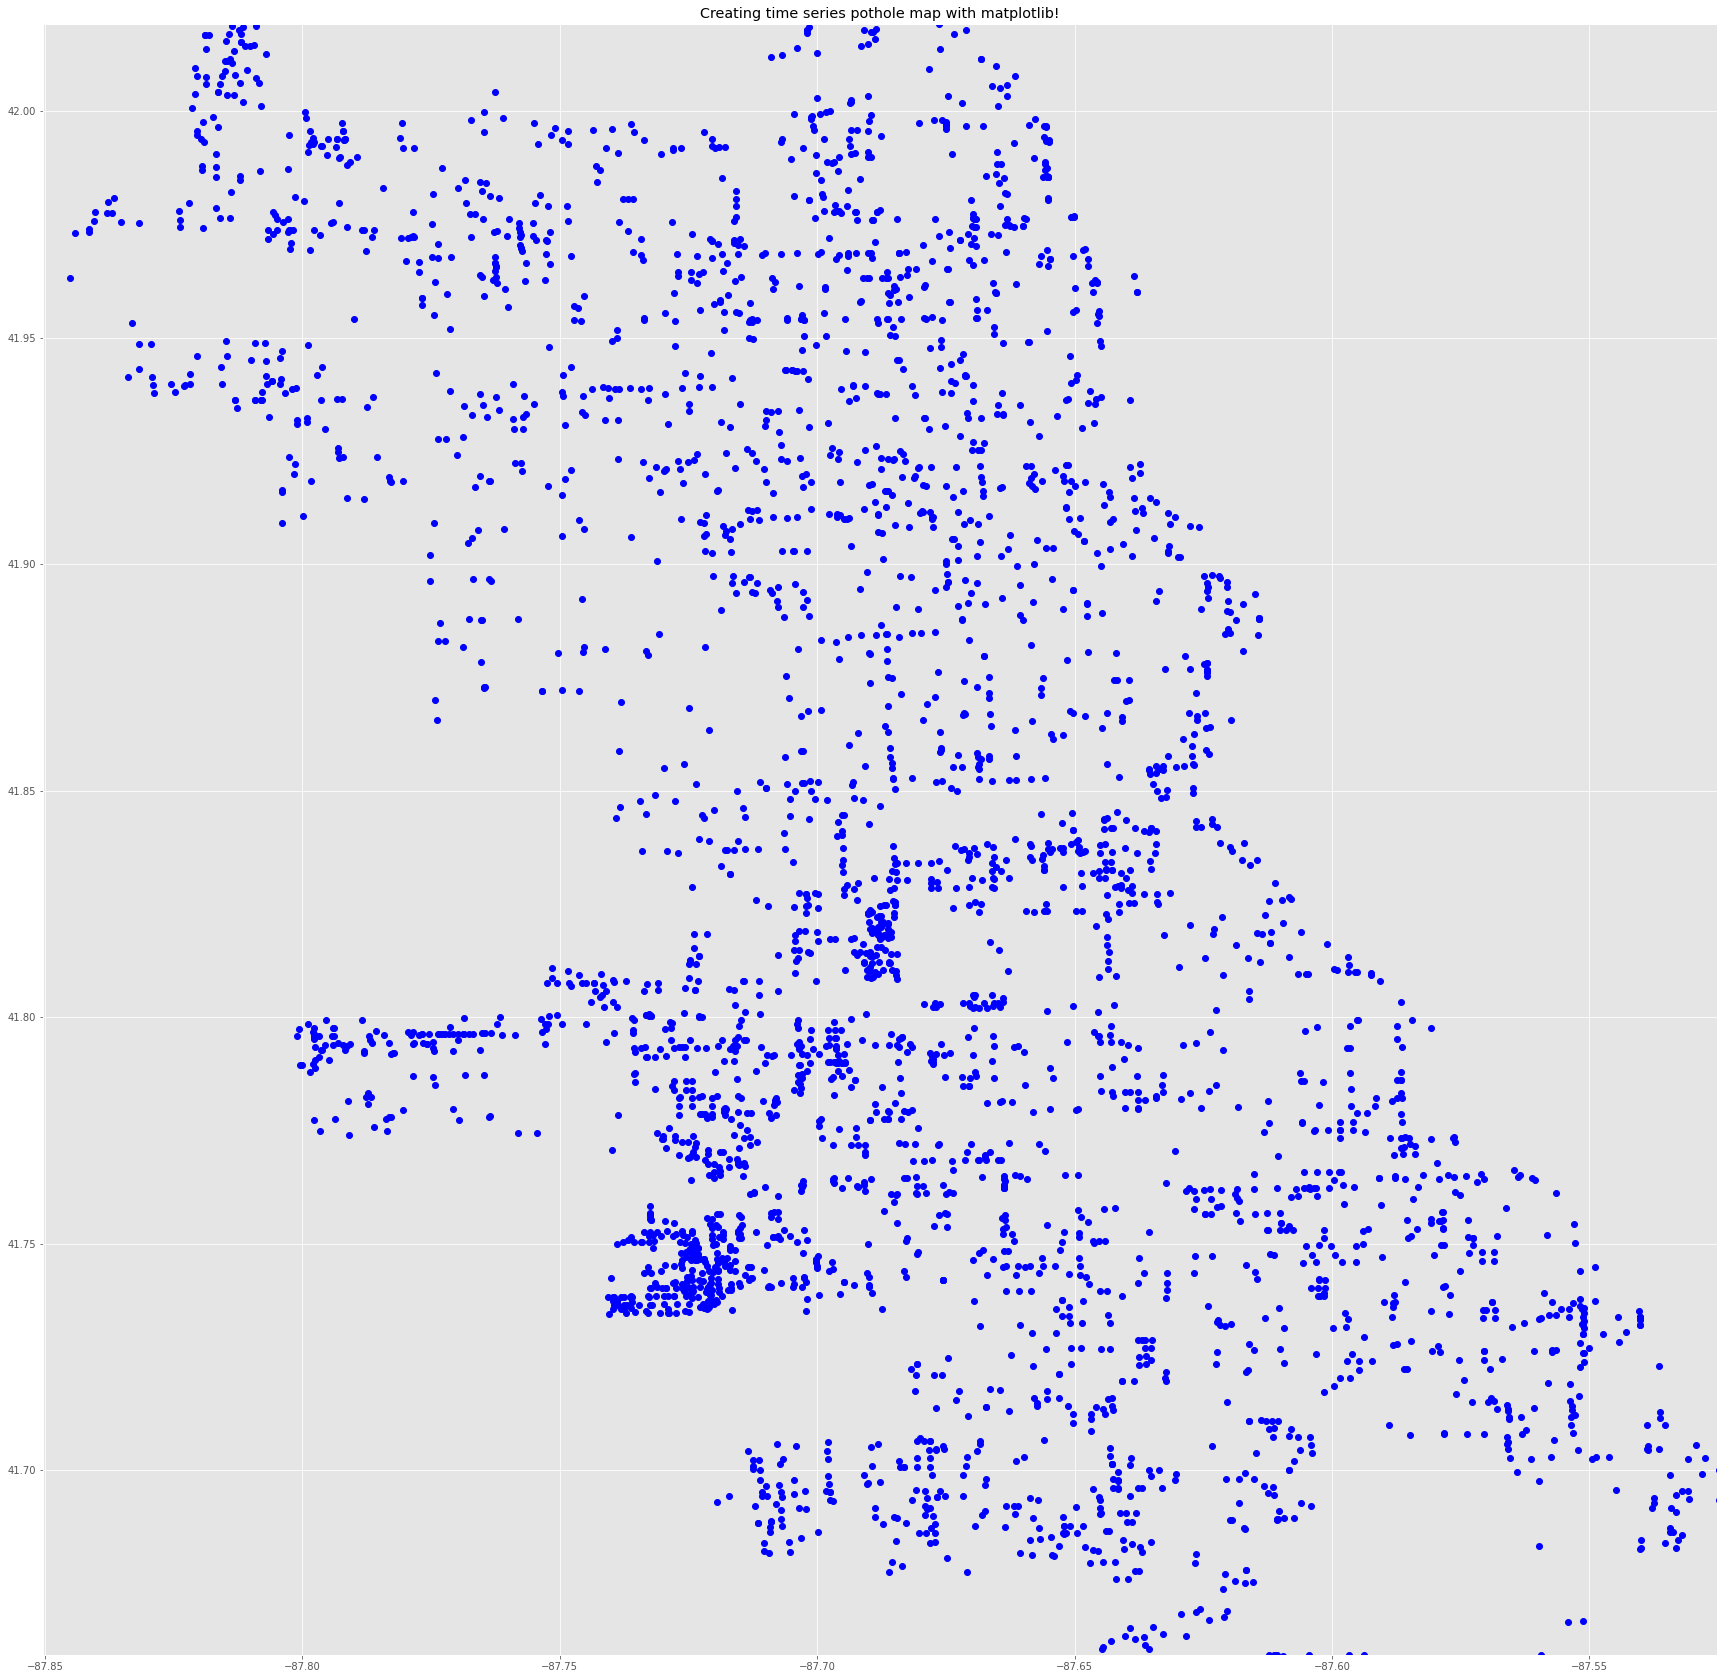

In [279]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np 
plt.style.use('ggplot')
mpl.rcParams['agg.path.chunksize'] = 10000
plt.rcParams["figure.figsize"] = [30, 30]

df = map_arr[-1]
xdata = df["LONGITUDE"].dropna().to_numpy()
ydata = df["LATITUDE"].dropna().to_numpy()
xlim=(min(xdata), max(xdata)) 
ylim=(min(ydata), max(ydata))


xlim = (-87.85041986215067, -87.52523350043245)
ylim = (41.65924455069546, 42.019245840973895)

print(xlim)
print(ylim)

fig = plt.figure()
#plt.scatter(xdata,ydata)
ax = plt.axes(xlim=xlim, ylim=ylim) 
#ax.set_facecolor((1.0, 0.47, 0.42))
sct, = plt.plot([], [],'o', color='blue', lw=2) 

# initialization function 
def init(): 
    # creating an empty plot/frame 
    sct.set_data([], [])
    return sct,

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i):
    df = map_arr[i]
    xdata = df["LONGITUDE"].dropna().to_numpy()
    ydata = df["LATITUDE"].dropna().to_numpy()
    sct.set_data(xdata,ydata)
    return sct,

# setting a title for the plot 
plt.title('Creating time series pothole map with matplotlib!') 
# hiding the axis details 
plt.axis('on') 

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=np.arange(0,len(pothole_count),1), interval=100, blit=True,repeat=False) 

# save the animation as mp4 video file 
anim.save(CSV_PATH + 'potholes_2020.gif', writer='imagemagick') 
#plt.show()

In [280]:
from scipy import stats as st
from scipy.stats import gaussian_kde as gaussian_kde
import numpy as np
from KDEpy import FFTKDE, NaiveKDE


def get_kde( x, y, xmin, xmax, ymin, ymax, xx, yy, positions):

    values = np.array([x, y]).T
    #values = values.reshape(values.shape[1], values.shape[0])
    #print("values is: " + str(values))
    #grid, points = get_kernel(values)
    points = get_kernel(values, positions)
    #kernel.set_bandwidth(bw_method=kernel.factor / 30.)
    f = np.reshape(points, xx.shape)
    #print(points.shape)
    #print(grid)
    #return grid, f
    return f

def get_kernel(data, positions):
    #print(data.shape)
    #print(data)
    estimator = FFTKDE(kernel='gaussian', norm=2, bw=0.001)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    points = estimator.fit(data, weights=None).evaluate(positions)
    #grid, points = estimator.fit(data, weights=None).evaluate(grid_size)
    #kernel = gaussian_kde(dataset=values, bw_method="silverman" )
    #return grid, points
    return points

In [281]:
grid_size = 1000
density_matrix_t_series = []
# Define the borders
x = [-87.9361,-87.5245]
y = [41.6447,42.023]
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY

xx, yy = np.mgrid[xmin:xmax:(grid_size*1j), ymin:ymax:(grid_size*1j)]
positions = np.dstack([xx.ravel(), yy.ravel()])
positions = positions.reshape(positions.shape[1], positions.shape[2])
grid_matrix = positions

In [282]:
for i, df in enumerate(map_arr):
    if df["LONGITUDE"].count() > 400:
        #grid, points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        points = get_kde(df["LONGITUDE"].dropna().to_numpy(), df["LATITUDE"].dropna().to_numpy() , xmin, xmax, ymin, ymax, xx, yy, positions)
        density_matrix_t_series.append(points)
        print("@" + str(i))
    

@22
@23
@27
@28
@29
@30
@31
@32
@33
@34
@35
@36
@37
@38
@39
@40
@41
@42
@43
@44
@45
@46
@47
@48
@49
@50
@51
@52
@53
@54
@55
@56
@57
@58
@59
@60
@61
@62
@63
@64
@65
@66
@67
@68
@69
@70
@71
@72
@73
@74
@75
@76
@77
@78
@79
@80
@81
@82
@83
@84
@85
@86
@87
@88
@89
@90
@91
@92
@93
@94
@95
@96
@97
@98
@99
@100
@101
@102
@103
@104
@105
@106


In [283]:
f = open(CSV_PATH +'density_matrix_t_series_2020.pkl', "wb")
dill.dump(density_matrix_t_series, file=f)
f.close()

f = open(CSV_PATH + 'grid_matrix_2020.pkl', "wb")
dill.dump(grid_matrix, file=f)
f.close()